In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import pickle
import matplotlib.pyplot as plt

### Data Ingestion

In [2]:
# pandemic corpus
df = pd.read_pickle("../../../data/prd/Paper/case_studies/pandemic_corpus.pkl")
df.reset_index(inplace=True, drop = True)

In [3]:
df.shape

(7571, 30)

In [4]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
0,90045,Study of Emerging Networks in Outbreak Respons...,Arts; Communicable Diseases; Communication; Co...,STUDY OF EMERGING NETWORKS IN OUTBREAK RESPONSE,NSF,NSF,NaN,0826995,9/15/2008,8/31/2012,"ANSELL, CHRISTOPHER","KELLER, ANN; REINGOLD, ARTHUR",09,124726725,UNIVERSITY OF CALIFORNIA BERKELEY,BERKELEY,CA,94704-5940,UNITED STATES,NaN,NaN,47.075,2008,726706.0,NaN,1,1,726706.0,1,study emerging networks outbreak responseprinc...
1,90243,One of the products of human development and p...,Affect; Agriculture; anthropogenesis; Award; b...,HSD: COLLABORATIVE RESEARCH: HUMAN-RELATED FAC...,NSF,NSF,NaN,0826779,10/1/2008,3/31/2012,"DASZAK, PETER","KILPATRICK, A MARM",08,077090066,ECOHEALTH ALLIANCE INC,NEW YORK,NY,10001-2320,UNITED STATES,NaN,NaN,47.075,2008,468673.0,NaN,2,2,700001.0,2,product human development population growth gl...
2,90573,Intellectual merit:The proposed project seeks ...,base; Basic Science; Biological; Biology; Bird...,COMBINING ECOLOGICAL AND MOLECULAR MODELS TO U...,NSF,NSF,NaN,0827416,9/1/2008,8/31/2011,"KOELLE, KATHARINA",NaN,04,044387793,DUKE UNIVERSITY,DURHAM,NC,27705-4010,UNITED STATES,NaN,NaN,47.074,2008,610071.0,NaN,1,1,610071.0,1,intellectual_merit propose project seek develo...
3,91397,West Nile virus re-emerges annually in urban s...,Birds; Chicago; Culicidae; Disease; Environmen...,WEST NILE VIRUS: ECO-EPIDEMIOLOGY OF DISEASE E...,NSF,NSF,NaN,0840403,9/1/2008,8/31/2012,"GOLDBERG, TONY L.","BRAWN, JEFFREY; RUIZ, MARILYN; KITRON, URIEL; ...",02,003255648,UNIVERSITY OF WISCONSIN SYSTEM,MADISON,WI,53715-1218,UNITED STATES,NaN,NaN,47.074,2008,1964529.0,NaN,1,1,1964529.0,1,west_nile virus emerge annually urban setting ...
4,93669,About five percent of the world's population d...,Affect; Disabled Persons; Disease; Emerging Co...,RESEARCH STARTER: POPULATION DYNAMICS AND EVOL...,NSF,NSF,NaN,0804039,8/1/2008,7/31/2010,"DENNEHY, JOHN J",NaN,09,064932676,RESEARCH FOUNDATION OF THE CITY UNIVERSITY OF ...,FLUSHING,NY,11367-1575,UNITED STATES,NaN,NaN,47.074,2008,67848.0,NaN,1,1,67848.0,1,percent world population die major influenza p...


In [5]:
l = [len(x) for x in df['ABSTRACT']]
lidx = np.argsort(l)

In [31]:
df['ABSTRACT'][lidx[38]]

'Recent reports suggest an increasing frequency of severe outcomes of influenza virus infection when people also are infected with Staphylococcus aureus. This research will investigate whether synergistic effects occur as a result of being infected with both agents, as opposed to just influenza virus or Staphylococcus aureus, by using a swine model.'

In [32]:
df['final_tokens'][lidx[38]]

'recent report suggest increase frequency severe outcome influenza virus infection people infect staphylococcus_aureus research investigate synergistic effect occur result infect agent oppose influenza virus staphylococcus_aureus swine model'

In [5]:
df.isnull().sum()

PROJECT_ID                       0
ABSTRACT                         0
PROJECT_TERMS                 1046
PROJECT_TITLE                    0
DEPARTMENT                       0
AGENCY                           0
IC_CENTER                     1051
PROJECT_NUMBER                   0
PROJECT_START_DATE            1004
PROJECT_END_DATE               984
CONTACT_PI_PROJECT_LEADER      752
OTHER_PIS                     6737
CONGRESSIONAL_DISTRICT        1619
DUNS_NUMBER                    270
ORGANIZATION_NAME               15
ORGANIZATION_CITY              976
ORGANIZATION_STATE            1107
ORGANIZATION_ZIP              1414
ORGANIZATION_COUNTRY           976
BUDGET_START_DATE             1846
BUDGET_END_DATE               1846
CFDA_CODE                     1331
FY                               0
FY_TOTAL_COST                  922
FY_TOTAL_COST_SUB_PROJECTS    6788
ORG_COUNT                        0
PI_COUNT                         0
FY_TOTAL_COST_SUM                0
NUM_RECORDS         

In [6]:
df.dtypes

PROJECT_ID                     object
ABSTRACT                       object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY                             object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
ORG_COUNT                       int64
PI_COUNT    

### Descriptive statistics on corpus

In [7]:
df["FY"] = df["FY"].astype('int')

In [8]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}

In [9]:
year_counts = df["FY"].value_counts().sort_index()
print(year_counts)

2008     479
2009     549
2010     545
2011     532
2012     442
2013     412
2014     388
2015     433
2016     440
2017     450
2018     452
2019     457
2020    1992
Name: FY, dtype: int64


<ipython-input-11-4f072fe5cead>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


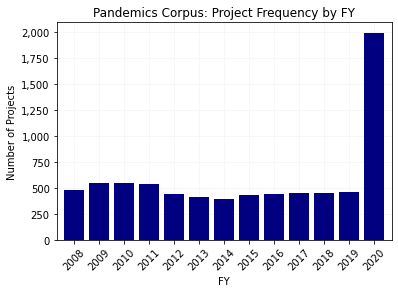

In [11]:
# plot
year = year_counts.index.tolist()
count = year_counts.values

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, count, color='navy')
plt.xticks(year, rotation=45)
plt.xlim(2007.3,2020.7)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY")
plt.ylabel("Number of Projects")
plt.title("Pandemics Corpus: Project Frequency by FY");

plt.savefig("./figures/pan_startyr_freq.png", dpi = 800, bbox_inches = "tight")
plt.savefig("./figures/pan_startyr_freq.pdf", dpi = 800, bbox_inches = "tight")

In [11]:
agency_counts = df["DEPARTMENT"].value_counts()
print(agency_counts)

HHS     6473
NSF      869
USDA     189
DOD       24
VA        11
NASA       3
EPA        2
Name: DEPARTMENT, dtype: int64


In [12]:
agency_counts.index.tolist()

['HHS', 'NSF', 'USDA', 'DOD', 'VA', 'NASA', 'EPA']

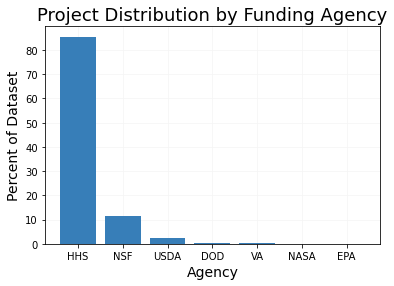

In [40]:
# plot
agency = agency_counts.index.tolist()
pct = 100*agency_counts.values/len(df)

#reload(plt)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(agency, pct, color=cb_pal['blue'])
#plt.xticks(agency, rotation=45)
plt.xlabel("Agency", fontsize = 14)
plt.ylabel("Percent of Dataset", fontsize = 14)
plt.title("Project Distribution by Funding Agency", fontsize = 18);

#plt.savefig("./figures/OECD/pan_agency_dist.png", dpi = 800, bbox_inches = "tight")
#plt.savefig("./figures/OECD/pan_agency_dist.pdf", dpi = 800, bbox_inches = "tight")

In [15]:
df.pivot_table(index=['DEPARTMENT','FY'], aggfunc='size')

DEPARTMENT  FY  
DOD         2009       1
            2013       2
            2014       2
            2016       3
            2017      11
            2018       5
EPA         2012       1
            2015       1
HHS         2008     447
            2009     505
            2010     512
            2011     502
            2012     412
            2013     390
            2014     368
            2015     394
            2016     414
            2017     417
            2018     430
            2019     439
            2020    1243
NASA        2009       1
            2012       1
            2015       1
NSF         2008      15
            2009      17
            2010      14
            2011      10
            2012       9
            2013       6
            2014       5
            2015      19
            2016      11
            2017       8
            2018       3
            2019       5
            2020     747
USDA        2008      17
            2009      24
        

In [16]:
dollars_by_year = df.groupby(['FY']).agg(COST = ('FY_TOTAL_COST_SUM', 'sum'),
                                        NUM_PROJECTS = ('PROJECT_ID', 'count'))
dollars_by_year

,COST,NUM_PROJECTS
FY,,
2008,2.726033e+08,479
2009,3.635090e+08,549
2010,3.590730e+08,545
2011,3.820779e+08,532
2012,2.931471e+08,442
2013,2.812850e+08,412
2014,2.317233e+08,388
2015,2.638013e+08,433
2016,3.236039e+08,440


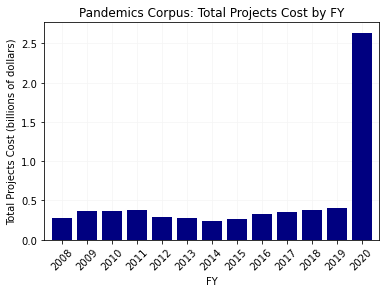

In [17]:
# plot
year = dollars_by_year.index.tolist()
dollars = dollars_by_year['COST'].values/1000000000

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, dollars, color='navy')
plt.xticks(year, rotation=45)
plt.xlim(2007.3,2020.7)
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY")
plt.ylabel("Total Projects Cost (billions of dollars)")
plt.title("Pandemics Corpus: Total Projects Cost by FY");

#plt.savefig("./figures/pan_cost_by_yr.png", dpi = 800, bbox_inches = "tight")
#plt.savefig("./figures/pan_cost_by_yr.pdf", dpi = 800, bbox_inches = "tight")

In [18]:
dollars_by_year['COST']/dollars_by_year['NUM_PROJECTS']

FY
2008    5.691091e+05
2009    6.621294e+05
2010    6.588495e+05
2011    7.181915e+05
2012    6.632287e+05
2013    6.827306e+05
2014    5.972249e+05
2015    6.092408e+05
2016    7.354635e+05
2017    7.853920e+05
2018    8.344693e+05
2019    8.843039e+05
2020    1.323401e+06
dtype: float64

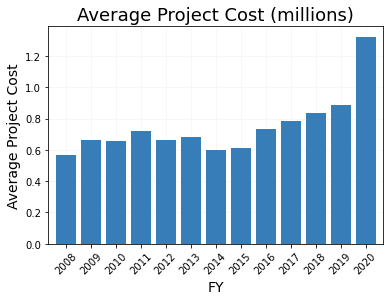

In [39]:
# plot
year = dollars_by_year.index.tolist()
avg_cost = (dollars_by_year['COST']/dollars_by_year['NUM_PROJECTS']).values/1000000

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, avg_cost, color=cb_pal['blue'])
plt.xticks(year, rotation=45)
plt.xlim(2007.3,2020.7)
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY", fontsize=14)
plt.ylabel("Average Project Cost", fontsize = 14)
plt.title("Average Project Cost (millions)", fontsize = 18);

plt.savefig("./figures/OECD/pan_avgcost_by_yr.png", dpi = 800, bbox_inches = "tight")
plt.savefig("./figures/OECD/pan_avgcost_by_yr.pdf", dpi = 800, bbox_inches = "tight")

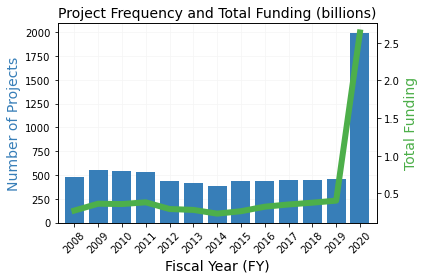

In [44]:
# number of projects and cost

year = dollars_by_year.index.tolist()
dollars = dollars_by_year['COST'].values/1000000000
count = dollars_by_year['NUM_PROJECTS'].values

fig, ax1 = plt.subplots()

ax1.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
ax1.bar(year, count, color=cb_pal['blue'], linewidth = 6)
ax1.set_xlabel('Fiscal Year (FY)', fontsize = 14)
ax1.set_ylabel('Number of Projects', color=cb_pal['blue'], fontsize = 14)
plt.xticks(year, rotation=45)
plt.xlim(2007.3,2020.7)
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total Funding', color=cb_pal['green'], fontsize = 14)  # we already handled the x-label with ax1
ax2.plot(year, dollars, color=cb_pal['green'], linewidth = 6)
#ax2.set_ylim(0,47)
#ax2.tick_params(axis='y')

plt.title("Project Frequency and Total Funding (billions)", fontsize=14);

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("./figures/OECD/pan_numproj_cost.png", dpi = 800, bbox_inches = "tight")
plt.savefig("./figures/OECD/pan_numproj_cost.pdf", dpi = 800, bbox_inches = "tight")

In [30]:
dollars_by_agency = df.groupby(['DEPARTMENT']).agg(COST = ('FY_TOTAL_COST_SUM', 'sum'),
                                        NUM_PROJECTS = ('PROJECT_ID', 'count'))
dollars_by_agency

,COST,NUM_PROJECTS
DEPARTMENT,,
DOD,5.465269e+07,24
EPA,8.760000e+05,2
HHS,6.140043e+09,6473
NASA,6.073750e+05,3
NSF,2.650338e+08,869
USDA,8.055860e+07,189
VA,0.000000e+00,11
